# Load Model
El notebook se encarga de tomar hiperparametros y los pesos de los mejores modelos y así poder demostrar la capacidad generativa de los modelos resultantes.

nota:
Para hacer finetunning se sugiere crear otro script/notebook aparte para así mantener modularidad.

In [7]:
# 02_main.ipynb
from grav_lens import get_datasets

from utils.model import create_model
from utils.loadsave import load_model_with_hyperparameters, load_hyperparameters, save_hyperparameters
from utils.optimize import dimensions, default_parameters

from functools import partial
import time
import pickle

import matplotlib.pyplot as plt
import numpy as np

In [8]:
import os 

# mi carpeta data se encuentra en el root
home_data = os.path.join("..", "..")
# Ejemplo de uso
# INDEX 0 es una carpeta de datasets mucho mas chica
train_dataset, val_dataset, test_dataset = get_datasets(data_index='1', max_files=60, home=home_data)

for X, Y in train_dataset.take(1):  # Mostrar un batch de entrenamiento
    print("Train X:", X.shape)
    print("Train Y:", Y.shape)

for X, Y in val_dataset.take(1):  # Mostrar un batch de validación
    print("Val X:", X.shape)
    print("Val Y:", Y.shape)

for X, Y in test_dataset.take(1):  # Mostrar un batch de prueba
    print("Test X:", X.shape)
    print("Test Y:", Y.shape)


Using data folder: ..\..\data\1
Train X: (32, 128, 128, 3)
Train Y: (32, 128, 128, 1)
Val X: (12, 128, 128, 3)
Val Y: (12, 128, 128, 1)
Test X: (6, 128, 128, 3)
Test Y: (6, 128, 128, 1)


c:\Users\fbien.DESKTOP-6FMEAR7\Desktop\grav_lensing\venv\lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 1 variables whereas the saved optimizer has 37 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
(6, 128, 128, 1)


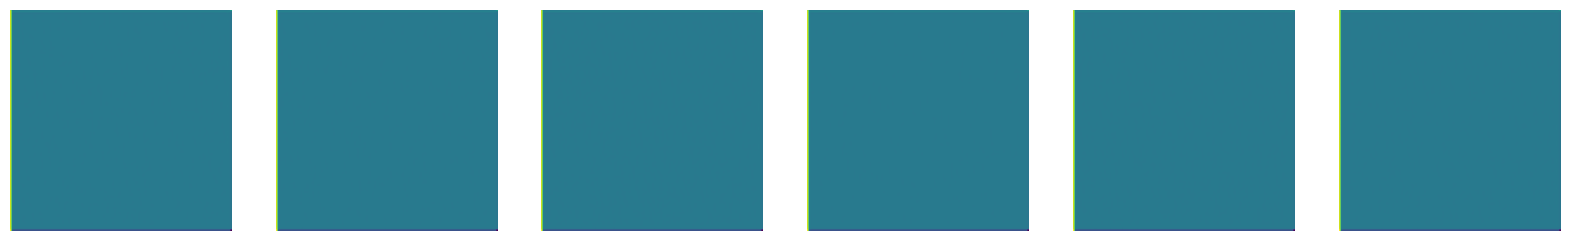

In [9]:
model = load_model_with_hyperparameters(1, create_model=create_model)

for X, Y in test_dataset.take(1):
    prediction = model.predict(X)

print(prediction.shape)

# Obtener la primera imagen de la predicción
predicted_images = prediction

# Configurar la figura
fig, axes = plt.subplots(1, predicted_images.shape[0], figsize=(20, 10))
axes = axes.flatten()

# Graficar cada imagen
for img, ax in zip(predicted_images, axes):
    ax.imshow(np.squeeze(img))  # Quitar el canal de color si es necesario
    ax.axis('off')

plt.show()